Notes:

Many Prices Are Missing

Distribution of difference in days with no prices:
1	2	3	4	5
0	281	93	94	0

S&P 500 Price = Closing Price

In [1]:
import pandas_datareader as web
from datetime import datetime
import urllib.request, urllib.parse, urllib.error
import json
import requests
import time
import pandas as pd 
import numpy as np
import tzlocal
import matplotlib.pyplot as plt
import seaborn; seaborn.set()






Data Collection

In [2]:
# Date range for Market Data

now = datetime.now()
start = datetime(2012, 9, 8)
end = datetime(2017, 12, 20)

# S&P 500 Data
sp = web.DataReader('SPX', 'morningstar', start, end)

sp = pd.DataFrame(sp)
sp = sp.reset_index()

sp = sp.set_index('Date')

sp.columns
sp = sp.drop(['Symbol','Open'], axis = 1)

sp = sp.rename(columns = {'Close' : 'S&P 500 Price', 'High' : 'S&P 500 High', 
                          'Low': 'S&P 500 Low', 'Volume' : 'S&P 500 Volume'})

In [3]:
# Retrieve BTC Data

urla = 'https://min-api.cryptocompare.com/data/histoday?fsym=BTC&tsym=USD&limit=999&aggregate=3&e=CCCAGG'
uha = urllib.request.urlopen(urla)
dataa = uha.read().decode('utf8', 'ignore')
jsa = json.loads(dataa)

t = []
closeBTC = []
volumefrom = []
volumeto = []

# parse through json data

for a in jsa['Data']:
	t.append(a['time'])

for b in jsa['Data']:
	closeBTC.append(b['close'])

for f in jsa['Data']:
	volumefrom.append(f['volumefrom'])

for g in jsa['Data']:
	volumeto.append(g['volumeto'])



dataBTC = {'Time BTC': pd.Series(t),'BTC Price': pd.Series(closeBTC),'BTC Volume': pd.Series(volumefrom), 'BTC Volume in USD': pd.Series(volumeto)}
dfBTC = pd.DataFrame(dataBTC)


time.sleep(10)

In [4]:
# Retrieve ETH Data

urlb = 'https://min-api.cryptocompare.com/data/histoday?fsym=ETH&tsym=USD&limit=999&aggregate=3&e=CCCAGG'
uhb = urllib.request.urlopen(urlb)
datab = uhb.read().decode('utf8', 'ignore')
jsb = json.loads(datab)

tE = []
closeETH = []
volumefromE = []
volumetoE = []

# parse through json data


for w in jsb['Data']:
	closeETH.append(w['close'])
    
for z in jsa['Data']:
	tE.append(z['time'])

for e in jsb['Data']:
	volumefromE.append(e['volumefrom'])

for r in jsb['Data']:
	volumetoE.append(r['volumeto'])


dataETH = {'Time ETH' : pd.Series(tE), 'ETH Price': pd.Series(closeETH),'ETH Volume': pd.Series(volumefromE), 'ETH Volume in USD': pd.Series(volumetoE)}
dfETH = pd.DataFrame(dataETH)


In [5]:
dfETH = dfETH.rename(columns = {'Time ETH' : 'Date'})
dfBTC = dfBTC.rename(columns = {'Time BTC' : 'Date'})

In [6]:
dfETH['Date'] = pd.to_datetime(dfETH['Date'] , unit = 's')
dfBTC['Date'] = pd.to_datetime(dfBTC['Date'] , unit = 's')

In [7]:
dfETH = dfETH.set_index('Date')
dfBTC = dfBTC.set_index('Date')

In [8]:
result = pd.concat([dfETH, dfBTC, sp], axis = 1)
result.replace(["NaN", 'NaT'], np.nan, inplace = True)
#result.dropna(how = 'all', inplace = True)

In [9]:
result = result.dropna(how='all',axis=0)

In [10]:
result = result.dropna(thresh = 8)
result.head()

,ETH Price,ETH Volume,ETH Volume in USD,BTC Price,BTC Volume,BTC Volume in USD,S&P 500 Price,S&P 500 High,S&P 500 Low,S&P 500 Volume
Date,,,,,,,,,,
2012-09-14,0.0,0.0,0.0,11.87,89829.44,1051114.19,1465.7739,NaN,NaN,0.0
2012-09-17,0.0,0.0,0.0,12.57,109444.76,1330285.84,1461.1885,NaN,NaN,0.0
2012-09-20,0.0,0.0,0.0,12.24,83388.68,1029328.03,1460.2619,NaN,NaN,0.0
2012-09-26,0.0,0.0,0.0,12.39,69496.65,854904.81,1433.3159,NaN,NaN,0.0
2012-10-02,0.0,0.0,0.0,12.85,121733.57,1553834.75,1445.7543,NaN,NaN,0.0


In [11]:
mindate = max(sp.idxmin().min().date(), dfBTC.idxmin().min().date(), dfETH.idxmin().min().date())
maxdate = min(sp.idxmax().max().date(), dfBTC.idxmax().max().date(), dfETH.idxmax().max().date())


print("SP         | start date: {} end date: {}".format(sp.idxmin().min().date(), sp.idxmax().max().date()))
print("dfETH      | start date: {} end date: {}".format(dfETH.idxmin().min().date(), dfETH.idxmax().max().date()))
print("dfBTC      | start date: {} end date: {}".format(dfBTC.idxmin().min().date(), dfBTC.idxmax().max().date()))
print("Plot index | start date: {} end date: {}".format(mindate, maxdate))

SP         | start date: 2012-09-10 end date: 2017-12-18
dfETH      | start date: 2012-09-14 end date: 2018-01-16
dfBTC      | start date: 2012-09-29 end date: 2017-12-20
Plot index | start date: 2012-09-29 end date: 2017-12-18


In [12]:
pricegraph = result[['ETH Price','BTC Price','S&P 500 Price']].copy()

In [13]:

price_return = pricegraph.apply(lambda x: x / x[0])


Current Data Frames

In [14]:
colnamesresult = list(result.columns)
print('Result: {}'.format(colnamesresult))
colnamesprice = list(pricegraph.columns)
print('Price: {}'.format(colnamesprice))


Result: ['ETH Price', 'ETH Volume', 'ETH Volume in USD', 'BTC Price', 'BTC Volume', 'BTC Volume in USD', 'S&P 500 Price', 'S&P 500 High', 'S&P 500 Low', 'S&P 500 Volume']
Price: ['ETH Price', 'BTC Price', 'S&P 500 Price']


Visualization

In [15]:
#pricegraph.plot.area(figsize=(20,10), xlim = [mindate,maxdate])

In [16]:
#pricegraph.plot(figsize=(20,20), xlim = [mindate,maxdate])

In [17]:
window_count = len(result.index)

covs = result[['S&P 500 Price']].rolling(window = window_count ).cov(result[['BTC Price']], pairwise=True)
correls = result[['S&P 500 Price','ETH Price', 'BTC Price']].rolling(window= window_count).corr()

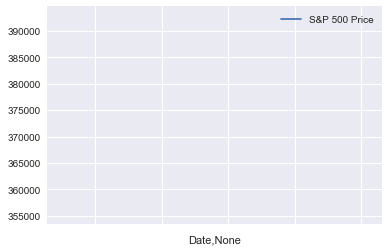

In [18]:
covs.plot()

In [1]:
correls.plot(ylim = [-1,1])

NameError: name 'correls' is not defined